## Mini Project 03- NLP Emotions: Exploratory Data Analysis (EDA)

Dataset:
- A. Tripathi, "Emotion Classification NLP", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/datasets/anjaneyatripathi/emotion-classification-nlp. [Accessed: 16- Jul- 2022].

Sources:
- WASSA-2017 Shared Task on Emotion Intensity. Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.
BibTex

Emotion Labels:
- joy: 1
- sadness: 2
- anger: 3
- fear: 4

### Import Libraries

In [22]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
import spacy
from pathlib import Path
import time


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import string
from collections import Counter
import re as regex

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [23]:
dfEmotionTrain = pd.read_csv("emotion-labels-train.csv")
dfEmotionTest = pd.read_csv("emotion-labels-test.csv")
dfEmotionVal = pd.read_csv("emotion-labels-val.csv")

### Inspect Data

In [24]:
dfEmotionTrain.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [25]:
dfEmotionTrain.shape

(3613, 2)

In [26]:
dfEmotionTrain['label'].value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [27]:
dfEmotionTest.shape

(3142, 2)

In [28]:
dfEmotionTest['label'].value_counts()

fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

In [29]:
dfEmotionVal.shape

(347, 2)

In [30]:
dfEmotionVal['label'].value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

### Merge the Data

In [31]:
# Merge train, test, and val datasets
dfMerge= pd.concat([dfEmotionTrain, dfEmotionVal, dfEmotionTest], axis= 0)

In [32]:
dfMerge.shape

(7102, 2)

In [33]:
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7102 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7102 non-null   object
 1   label   7102 non-null   object
dtypes: object(2)
memory usage: 166.5+ KB


In [34]:
# Check for null values
dfMerge.isna().sum()

text     0
label    0
dtype: int64

In [35]:
dfData= dfMerge.copy(deep=True)

In [36]:
# Replace text labels with numerical values
dfData['label'].replace({'joy': 1, 'sadness': 2, 'anger': 3, 'fear': 4}, inplace= True)

In [37]:
dfData.sample(5)

,text,label
2154,Should I give the windy tiger those ankle and ...,3
2564,#welfarereform should not be a 'model' for .,3
1510,.@SimonNRicketts if you don't know what a patr...,4
1169,"@eliroth ya know I love ya man, but #TheGreenI...",4
119,⊰ @FrameOfAnAngel ⊱ \n\n+ Of them. I'm here fo...,4


In [38]:
dfLabelEmotion= dfMerge.groupby('label')['text'].count()
# dfLabelNum= dfData.groupby('label')['text'].count()
dfLabelEmotion

label
anger      1701
fear       2252
joy        1616
sadness    1533
Name: text, dtype: int64

In [39]:
dfLabelEmotion.index.values

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

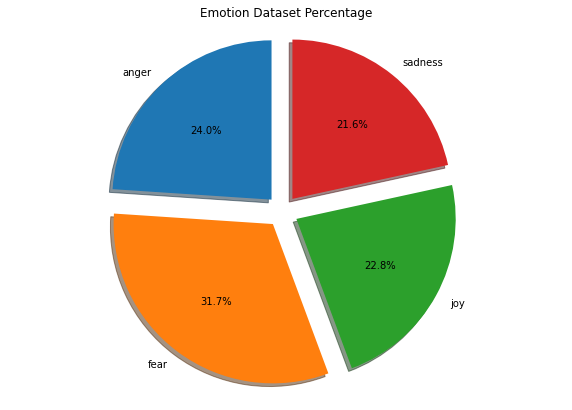

In [40]:
# plot frequency of some observations using pie chart
plt.rcParams['figure.figsize'] = (10, 7)

# fig = plt.figure(figsize =(10, 7))
x = np.arange(-10,11,1)
labels =  dfLabelEmotion.index
frequency = dfLabelEmotion
fig1, ax1 = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 3rd slice (i.e. 'Data Scientist')
ax1.pie(frequency, explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Emotion Dataset Percentage')
plt.savefig('image01.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

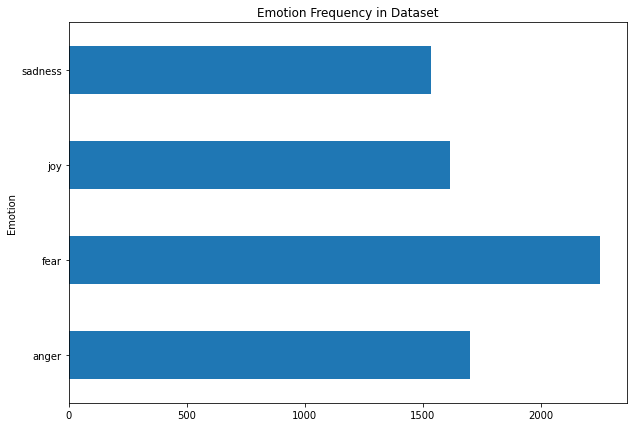

In [41]:
ax= dfLabelEmotion.plot.barh(x='text', y= dfLabelEmotion.index)
# ax.set_xlabel('Months')
ax.set_ylabel('Emotion')
ax.set_title('Emotion Frequency in Dataset')
plt.savefig('image02.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

From initial analysis of the dataset, the graphs indicate that the data is balanced across the 4 emotion labels

In [42]:
filepath = Path('textDataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfData.to_csv(filepath)